In [1]:
# Importing the  Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# For handling imbalanced data 
from imblearn.over_sampling import SMOTE

In [2]:
#Importing the dataset
df= pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
#Previewing the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Changing Total Charges Datatype 
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
#Checking for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Dropping missing variables
df.dropna(inplace = True)

In [8]:
#Checking statistical feaatures
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Dropping the 'customerID' 
df.drop('customerID', axis=1, inplace=True)



In [10]:
# Convert 'Churn' target variable to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

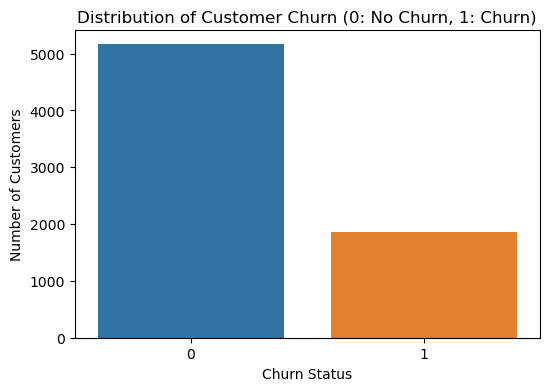

Churn distribution:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64
Note: The dataset is imbalanced, with fewer churned customers.


In [11]:
# Exploratory Data analysis
# Target Variable Analysis: Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn (0: No Churn, 1: Churn)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()
print(f"Churn distribution:\n{df['Churn'].value_counts(normalize=True) * 100}")
print("Note: The dataset is imbalanced, with fewer churned customers.")


Churn Rate by Contract Type:


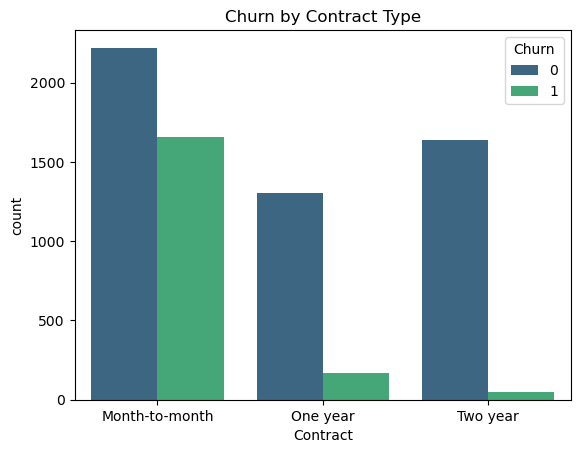

Observation: Customers with Month-to-month contracts churn more.


In [12]:
# Analyze churn by 'Contract' type
print("\nChurn Rate by Contract Type:")
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn by Contract Type')
plt.show()
print("Observation: Customers with Month-to-month contracts churn more.")



Churn Rate by Internet Service:


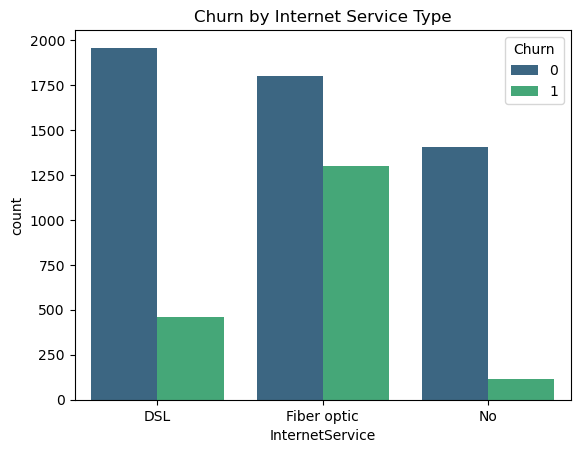

Observation: Fiber optic internet users seem to churn more.


In [13]:
# Analyze churn by 'InternetService' type
print("\nChurn Rate by Internet Service:")
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis')
plt.title('Churn by Internet Service Type')
plt.show()
print("Observation: Fiber optic internet users seem to churn more.")


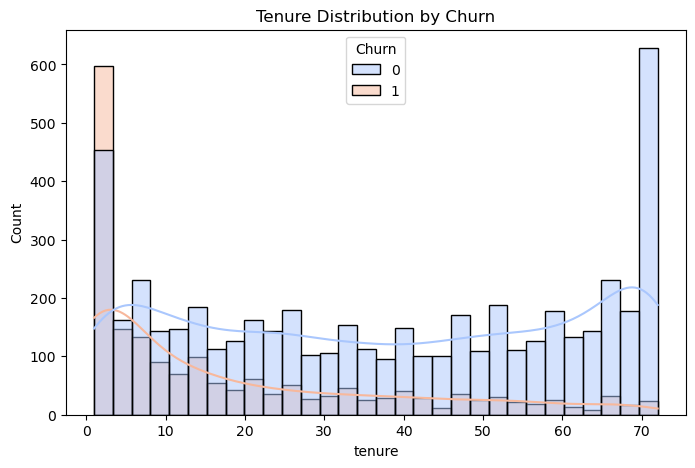

Observation: Shorter tenure (newer customers) appears to have higher churn.


In [14]:
# Analyze 'tenure' (how long they've been a customer) vs Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='coolwarm')
plt.title('Tenure Distribution by Churn')
plt.show()
print("Observation: Shorter tenure (newer customers) appears to have higher churn.")

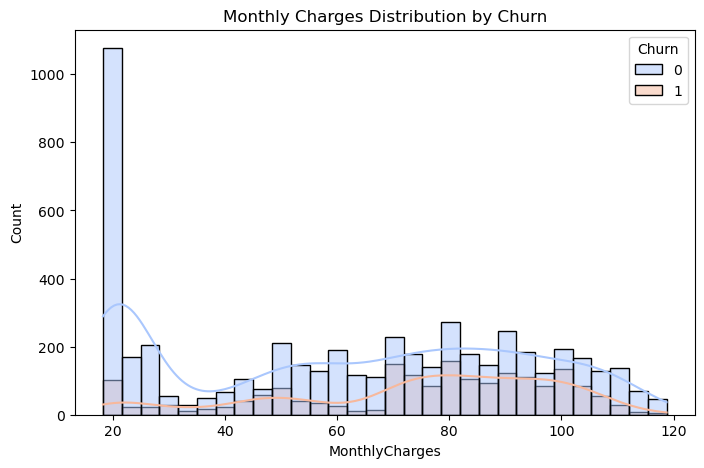

Observation: Customers with higher monthly charges seem to churn more.


In [15]:
# Analyze 'MonthlyCharges' vs Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30, palette='coolwarm')
plt.title('Monthly Charges Distribution by Churn')
plt.show()
print("Observation: Customers with higher monthly charges seem to churn more.")


In [16]:
# Separate features (X) from the target (y)
X = df.drop('Churn', axis=1) # All columns except 'Churn'
y = df['Churn']              # Only the 'Churn' column

In [17]:
# Identify columns that are numbers (for scaling) and text (for encoding)
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print(f"Numerical features: {numerical_cols}")
print(f"Categorical features: {categorical_cols}")

Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [18]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [19]:
# Split the data into training and testing sets
# We use 'stratify=y' to ensure both sets have a similar proportion of churned customers.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [21]:
# Handle class imbalance using SMOTE on the processed training data only
# SMOTE creates synthetic (fake but realistic) samples of the minority class (churners)
# This helps the model learn better from the imbalanced data.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train) # Use X_train_processed here
print(f"Training set shape after SMOTE: {X_train_resampled.shape}")
print(f"Churn distribution in resampled training set:\n{y_train_resampled.value_counts(normalize=True) * 100}")


Training set shape after SMOTE: (8260, 45)
Churn distribution in resampled training set:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [22]:
# Model Training
# Using Logistic Regression
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42, solver='liblinear')

In [23]:
# Using Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)


--- Logistic Regression Results ---
Classification Report (shows Precision, Recall, F1-score):
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

Confusion Matrix:
[[739 294]
 [ 83 291]]


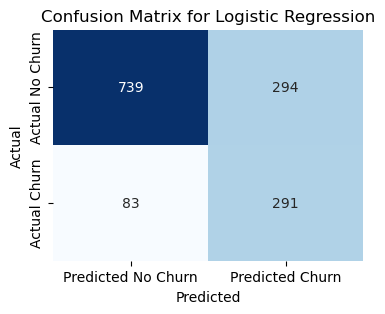

ROC AUC Score: 0.8335


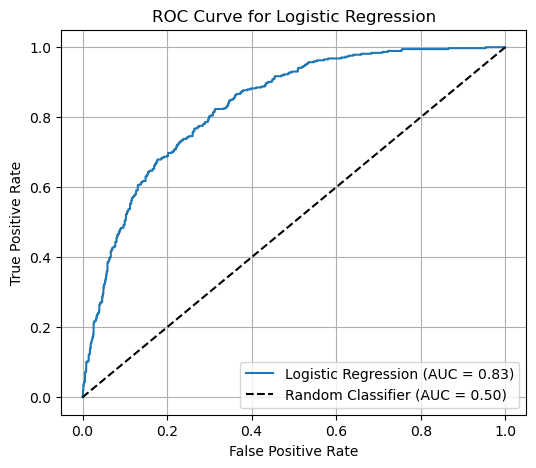


--- Random Forest Results ---
Classification Report (shows Precision, Recall, F1-score):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407

Confusion Matrix:
[[871 162]
 [160 214]]


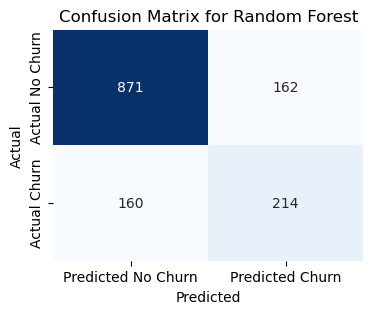

ROC AUC Score: 0.8101


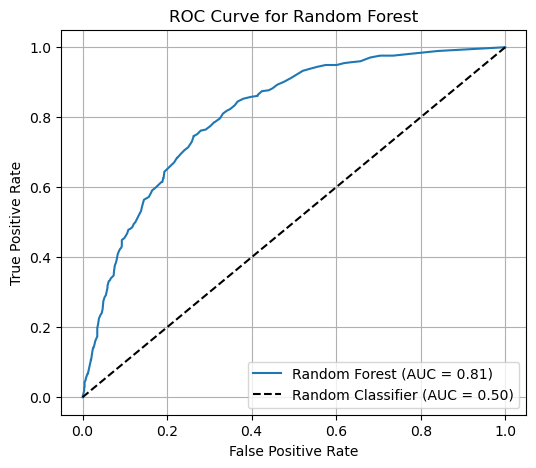


--- Model Comparison ---
Logistic Regression performed slightly better with ROC AUC: 0.8335

We'll consider the Logistic Regression as our best model for now.


In [24]:
# Model Evaluation 
# Function to evaluate a model and print key metrics
def evaluate_model(model, X_test_processed, y_test, model_name):
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1] # Probability of churn

    print(f"\n--- {model_name} Results ---")
    print("Classification Report (shows Precision, Recall, F1-score):")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No Churn', 'Predicted Churn'],
                yticklabels=['Actual No Churn', 'Actual Churn'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}") # Higher is better, closer to 1.0
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    return roc_auc # Return AUC for comparison


# Evaluate both models
log_reg_auc = evaluate_model(log_reg_model, X_test_processed, y_test, 'Logistic Regression')
rf_auc = evaluate_model(rf_model, X_test_processed, y_test, 'Random Forest')

print("\n--- Model Comparison ---")
if rf_auc > log_reg_auc:
    print(f"Random Forest performed slightly better with ROC AUC: {rf_auc:.4f}")
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    print(f"Logistic Regression performed slightly better with ROC AUC: {log_reg_auc:.4f}")
    best_model = log_reg_model
    best_model_name = "Logistic Regression"

print(f"\nWe'll consider the {best_model_name} as our best model for now.")




--- Interpretation & Recommendations ---

Top 10 Most Influential Factors for Churn (from Logistic Regression):
                            Feature  Coefficient
1                            tenure    -1.411575
38                Contract_Two year    -0.774955
3                      TotalCharges     0.755333
2                    MonthlyCharges    -0.726988
36          Contract_Month-to-month     0.698200
16      InternetService_Fiber optic     0.690406
15              InternetService_DSL    -0.647244
9                    Dependents_Yes    -0.295183
31  StreamingTV_No internet service    -0.276716
28  TechSupport_No internet service    -0.276716

Positive coefficients mean the feature increases churn probability.
Negative coefficients mean the feature decreases churn probability.


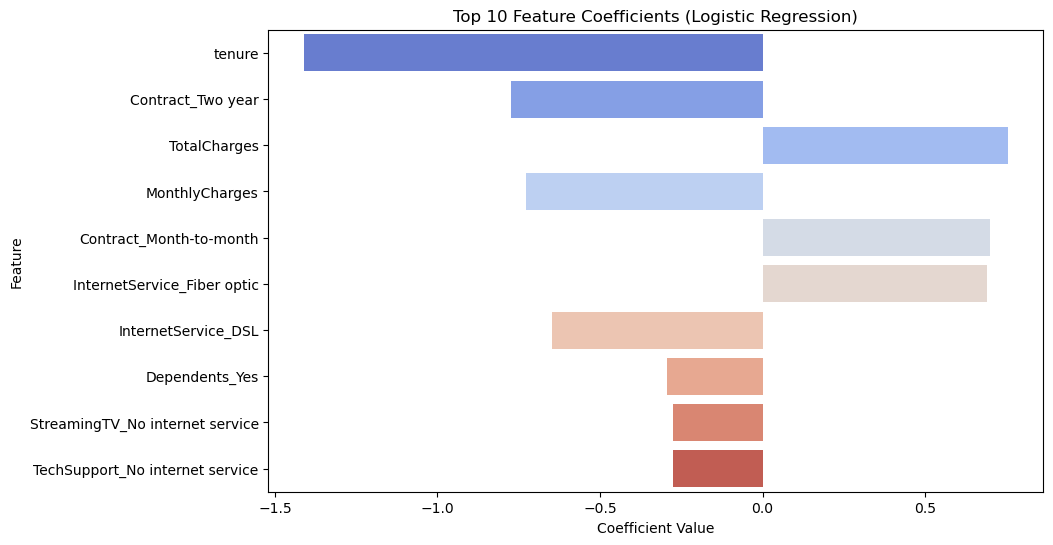


--- Key Takeaways & Recommendations ---
1. **Contract Type Matters:** Customers on month-to-month contracts are most likely to churn. Offer incentives (like discounts) for them to switch to 1-year or 2-year contracts.
2. **Internet Service Impact:** Fiber optic internet users might be churning more. Investigate if this is due to service quality, pricing, or support issues specific to fiber optic.
3. **New Customer Churn:** Newer customers (low tenure) have a high churn risk. Implement strong onboarding programs and early check-ins to ensure satisfaction.
4. **Monthly Charges:** High monthly charges correlate with churn. Consider offering personalized bundles or promotions to high-spending customers at risk.
5. **Proactive Retention:** Use this model to identify customers at high risk of churning BEFORE they leave, allowing the company to reach out with targeted offers or support.


In [25]:
# --- 8. Interpretation and Recommendations (from the best model) ---
print("\n--- Interpretation & Recommendations ---")

# Get feature names after one-hot encoding for better interpretability
# This is crucial for understanding feature importance/coefficients
# The preprocessor has been fitted on X_train, so we use it here.
feature_names_processed = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

if hasattr(best_model, 'feature_importances_'): # For Random Forest
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names_processed, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    print("\nTop 10 Most Important Factors for Churn (from Random Forest):")
    print(feature_importance_df.head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

elif hasattr(best_model, 'coef_'): # For Logistic Regression
    # For Logistic Regression, coefficients show the strength and direction of relationship
    coefs = best_model.coef_[0] if best_model.coef_.ndim > 1 else best_model.coef_
    coef_df = pd.DataFrame({'Feature': feature_names_processed, 'Coefficient': coefs})
    coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient']) # Use absolute value for sorting importance
    coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

    print("\nTop 10 Most Influential Factors for Churn (from Logistic Regression):")
    print(coef_df[['Feature', 'Coefficient']].head(10))
    print("\nPositive coefficients mean the feature increases churn probability.")
    print("Negative coefficients mean the feature decreases churn probability.")

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='coolwarm')
    plt.title('Top 10 Feature Coefficients (Logistic Regression)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()


# General business recommendations based on common churn drivers
print("\n--- Key Takeaways & Recommendations ---")
print("1. **Contract Type Matters:** Customers on month-to-month contracts are most likely to churn. Offer incentives (like discounts) for them to switch to 1-year or 2-year contracts.")
print("2. **Internet Service Impact:** Fiber optic internet users might be churning more. Investigate if this is due to service quality, pricing, or support issues specific to fiber optic.")
print("3. **New Customer Churn:** Newer customers (low tenure) have a high churn risk. Implement strong onboarding programs and early check-ins to ensure satisfaction.")
print("4. **Monthly Charges:** High monthly charges correlate with churn. Consider offering personalized bundles or promotions to high-spending customers at risk.")
print("5. **Proactive Retention:** Use this model to identify customers at high risk of churning BEFORE they leave, allowing the company to reach out with targeted offers or support.")
